In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [3]:
train_features = train_df.iloc[:,train_df.columns != 'label']
train_labels = train_df.iloc[:,train_df.columns == 'label']
train_labels = train_labels.values.reshape(-1)

test_features = test_df.iloc[:,test_df.columns != 'label']
test_labels = test_df.iloc[:,test_df.columns == 'label']
test_labels = test_labels.values.reshape(-1)

In [4]:
def pretty_print(image_example):
    """ Pretty prints a Sign Language MNIST example. Code taken from Fashion MNIST Homework.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))

Dimensions of training set feature matrix: (27455, 784)
Dimensions of training set label matrix: (27455,)
[ 55  68  74  81  90  99 102 106 110 112 114 116 118 119 121 123 124 125 127 128 129 130 132 133 134 135 135 135
  59  69  75  82  91 100 103 107 110 112 115 117 119 120 122 124 125 126 127 131 130 131 133 134 135 135 136 136
  60  71  76  82  93 100 104 108 111 113 116 118 120 122 122 125 127 128 128 118 129 133 133 135 136 135 137 138
  61  71  77  84  94 102 105 108 112 114 117 119 121 122 124 126 128 129 141  96 113 136 134 136 137 138 138 141
  63  72  79  86  96 102 106 109 112 116 118 119 121 123 125 127 128 134 146 102  98 139 134 137 138 140 140 142
  65  73  79  87  97 103 106 110 113 116 119 120 122 124 126 127 127 133 145 111  90 138 136 139 140 141 142 142
  67  74  80  88  98 104 106 110 115 118 119 121 122 124 124 128 130 130 145 123  89 133 138 139 141 141 142 143
  68  75  82  89 100 104 107 111 114 118 119 121 123 124 136 114 110 134 151 136  91 123 143 140 140 14

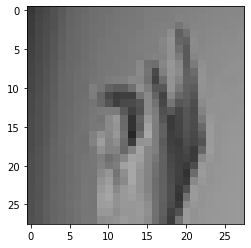

In [5]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

print("Dimensions of training set feature matrix:", train_features.shape)
print("Dimensions of training set label matrix:", train_labels.shape)

EXAMPLE_INDEX = np.random.randint(27455)
pretty_print(train_features.iloc[EXAMPLE_INDEX].values)

plt.figure()
plt.imshow(train_features.iloc[EXAMPLE_INDEX].values.reshape(28,28),cmap='gray', vmin=0, vmax=255)
plt.show()

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [7]:
ovr_pipeline = Pipeline([('scaler', MinMaxScaler()), 
                         ('ovr', OneVsRestClassifier(SVC()))
                        ])

In [ ]:
# params_ovr = {'ovr__estimator__C': [0.1, 1, 10], 'ovr__estimator__kernel': ['linear'], 'ovr__estimator__gamma': [0.01, 0.1, 1]}

# ovr_grid = GridSearchCV(ovr_pipeline, params_ovr, scoring='f1_weighted', cv=5, n_jobs=-1)
# ovr_grid.fit(train_features, train_labels)
# print(ovr_grid.best_params_)
# print(ovr_grid.best_score_)

In [7]:
params_ovr = {'ovr__estimator__C': [0.1, 1, 10, 100, 1000], 'ovr__estimator__kernel': ['linear'], 'ovr__estimator__gamma': [0.01, 0.1, 1, 10]}

ovr_grid = GridSearchCV(ovr_pipeline, params_ovr, scoring='f1_weighted', cv=5, n_jobs=-1)
ovr_grid.fit(train_features, train_labels)
print(ovr_grid.best_params_)
print(ovr_grid.best_score_)

/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'ovr__estimator__C': 10, 'ovr__estimator__gamma': 0.01, 'ovr__estimator__kernel': 'linear'}
0.9999635813851903


In [ ]:
C = [0.1, 1, 10]

for c in C:
    params_ovr = {'ovr__estimator__C': [c], 'ovr__estimator__kernel': ['linear']}
    ovr_grid = GridSearchCV(ovr_pipeline, params_ovr, scoring='f1_weighted', cv=5, n_jobs=-1)
    ovr_grid.fit(train_features, train_labels)
    print(ovr_grid.best_params_)
    print(ovr_grid.best_score_)

In [ ]:
gamma = [0.01, 0.1, 1]

for g in gamma:
    params_ovr = {'ovr__estimator__kernel': ['linear'], 'ovr__estimator__gamma': [g]}
    ovr_grid = GridSearchCV(ovr_pipeline, params_ovr, scoring='f1_weighted', cv=5, n_jobs=-1)
    ovr_grid.fit(train_features, train_labels)
    print(ovr_grid.best_params_)
    print(ovr_grid.best_score_)

In [8]:
ovr = OneVsRestClassifier(SVC(C=10, kernel='linear', gamma=0.01))
ovr.fit(train_features, train_labels)

OneVsRestClassifier(estimator=SVC(C=10, gamma=0.01, kernel='linear'))

In [10]:
from sklearn.metrics import f1_score

print(f1_score(train_labels, ovr.predict(train_features), average='weighted'))

print(f1_score(test_labels, ovr.predict(test_features),average = 'weighted'))

1.0
0.5854532950997038


In [12]:
print(ovr.score(train_features, train_labels))

1.0


In [14]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ovr, train_features, train_labels, cv=5))

[0.99981788 0.99981788 0.99981788 1.         1.        ]
